
## Overview

This project aims to delve into the workings of diffusion models, a class of generative models, and their application in image generation, explicitly using the CelebA dataset. A significant focus will be on understanding U-Net architectures and their role in diffusion models.

## Objectives

1. Understanding U-Net and Diffusion Models:
   - Begin with a comprehensive exploration of U-Net architectures, referencing the U-Net Paper: https://arxiv.org/abs/1505.04597.
   - Dive into the theory and mechanics of diffusion models, using resources like the Score-Based Generative Modeling Paper: https://arxiv.org/abs/2011.13456 and relevant blog posts.
   

2. Dataset Preparation:
   - Utilize the CelebA dataset, ensuring appropriate preprocessing for diffusion models.


3. Implementing Diffusion Models:
   - Implement a diffusion model suitable for generating images from the CelebA dataset. Focus on integrating U-Net as a component of the diffusion model.
   - Utilize tutorials and resources such as Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239 and the Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modeling.ipynb.


4. Generating Images with Diffusion Models:
   - Apply the implemented diffusion model to generate images from the CelebA dataset. Evaluate the quality and fidelity of the generated images.


5. Documentation:
   - Create a detailed README file outlining the project's goals, methods, and key findings.
   - Write a `REPORT.MD` that provides an in-depth explanation of U-Net architectures and diffusion models, including their mathematical and practical aspects in image generation.


6. Analysis and Results:
   - Analyze the performance of the diffusion model in generating images. Discuss any challenges encountered and how they were addressed.


## Expected Deliverables

1. Codebase: Complete Python code for implementing and training the diffusion model with U-Net architecture.
2. Generated Images: A collection of images generated from the CelebA dataset using the diffusion model.
3. Documentation:
   - `README.md`: A concise document summarizing the project’s objectives, methodology, and outcomes.
   - `REPORT.MD`: A comprehensive report detailing the theoretical background and practical implementation of U-Net and diffusion models in image generation.

## Resources and References

- U-Net Paper: https://arxiv.org/abs/1505.04597
- Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modeling.ipynb
- Score-Based Generative Modeling through Stochastic Differential Equations: https://arxiv.org/abs/2011.13456
- Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239
- Blog posts on diffusion models: Post 1: https://yang-song.net/blog/2021/score/, Post 2: https://lilianweng.github.io/posts/2021-07-11-diffusion-models/


## 1. Understanding U-Net and Diffusion Models

*Begin with a comprehensive exploration of U-Net architectures, referencing the U-Net Paper: https://arxiv.org/abs/1505.04597.*

*Dive into the theory and mechanics of diffusion models, using resources like the Score-Based Generative Modeling Paper: https://arxiv.org/abs/2011.13456 and relevant blog posts.*

### What are U-Net architectures

The U-net architecture is a specific architecture introduced by Ronneberger et al. (2015) for biological image segmentation and was lately adopted for all other kinds of tasks. It is particularly useful for image segmentations, hip resolution, and diffusion models. It's called U-net because of the U-shape shape of its architecture. 

In the original paper, the architecture is presented as follows:

<div>
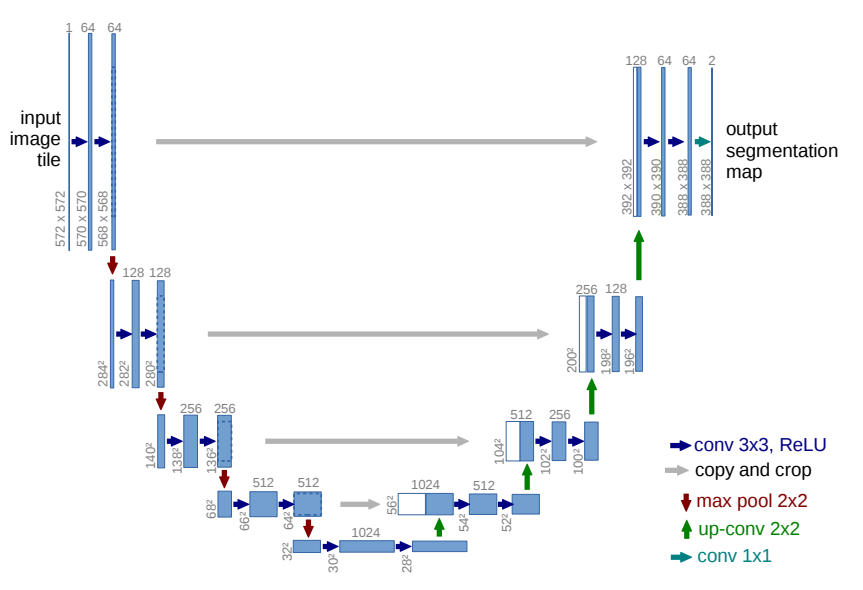
</div>


This network architecture is a convolutional neural network model that can be devided into two different phases: a contractig path and an expansive path. It is imporant to point out that both paths are symmetric.
    
The contracting path (left side of the previous image), also known as encoder, is the "descending" part. During this phase, the model extracts information about what is present in the image, to the detriment of spatial and contextual information. It follows the typical architecture of a convolutional neural network. It is made up of repeated 3x3 convolutional layers at each of the stages, each followed by a ReLU activation function that is applied to each element for each of the features.  Between the stages, a 2x2 max pooling operation is used for downsampling the features. This max pooling operation reduces the spatial dimensions of the features, so to compensate for it the channels are doubled after each downsampling.

The expansive path (right side of the previous image), also known as decode, is the "ascending" part after the contraction point of the model. The objective is to reconstruct the input using the information extracted during the contracting path. It is also composed of repeated 3x3 convolutional layers followed by a ReLU activation function. Instead of downsampling with max pooling, the decoder upsamples the current set of features. It then applies a 2x2 convolutional layer that halves the number of channels. The up sampling operation is used to restore the spational resolution of the features that were lost during the contracting phase.

Besides the encoder and decoder, thera are two other elements that are important in the U-net architecture: the bottlenet and the connecting paths. 

The Connecting paths take a copy of the features from the symmetrical part of the encoder and concatenate them onto their opposing stage in the decoder. 

The bottleneck is where the encoder switches into the decoder. First, we downsample the features with a 2x2 max pooling operation. Then we pass them through the repeated 3x3 convolutional layers followed by a ReLU activation function and we double the channels. Finally, we upsample them again to their previous resolution.

Here there is a simplified U-Net drawing that I made to make the distinction between this four element clearer:





<div>
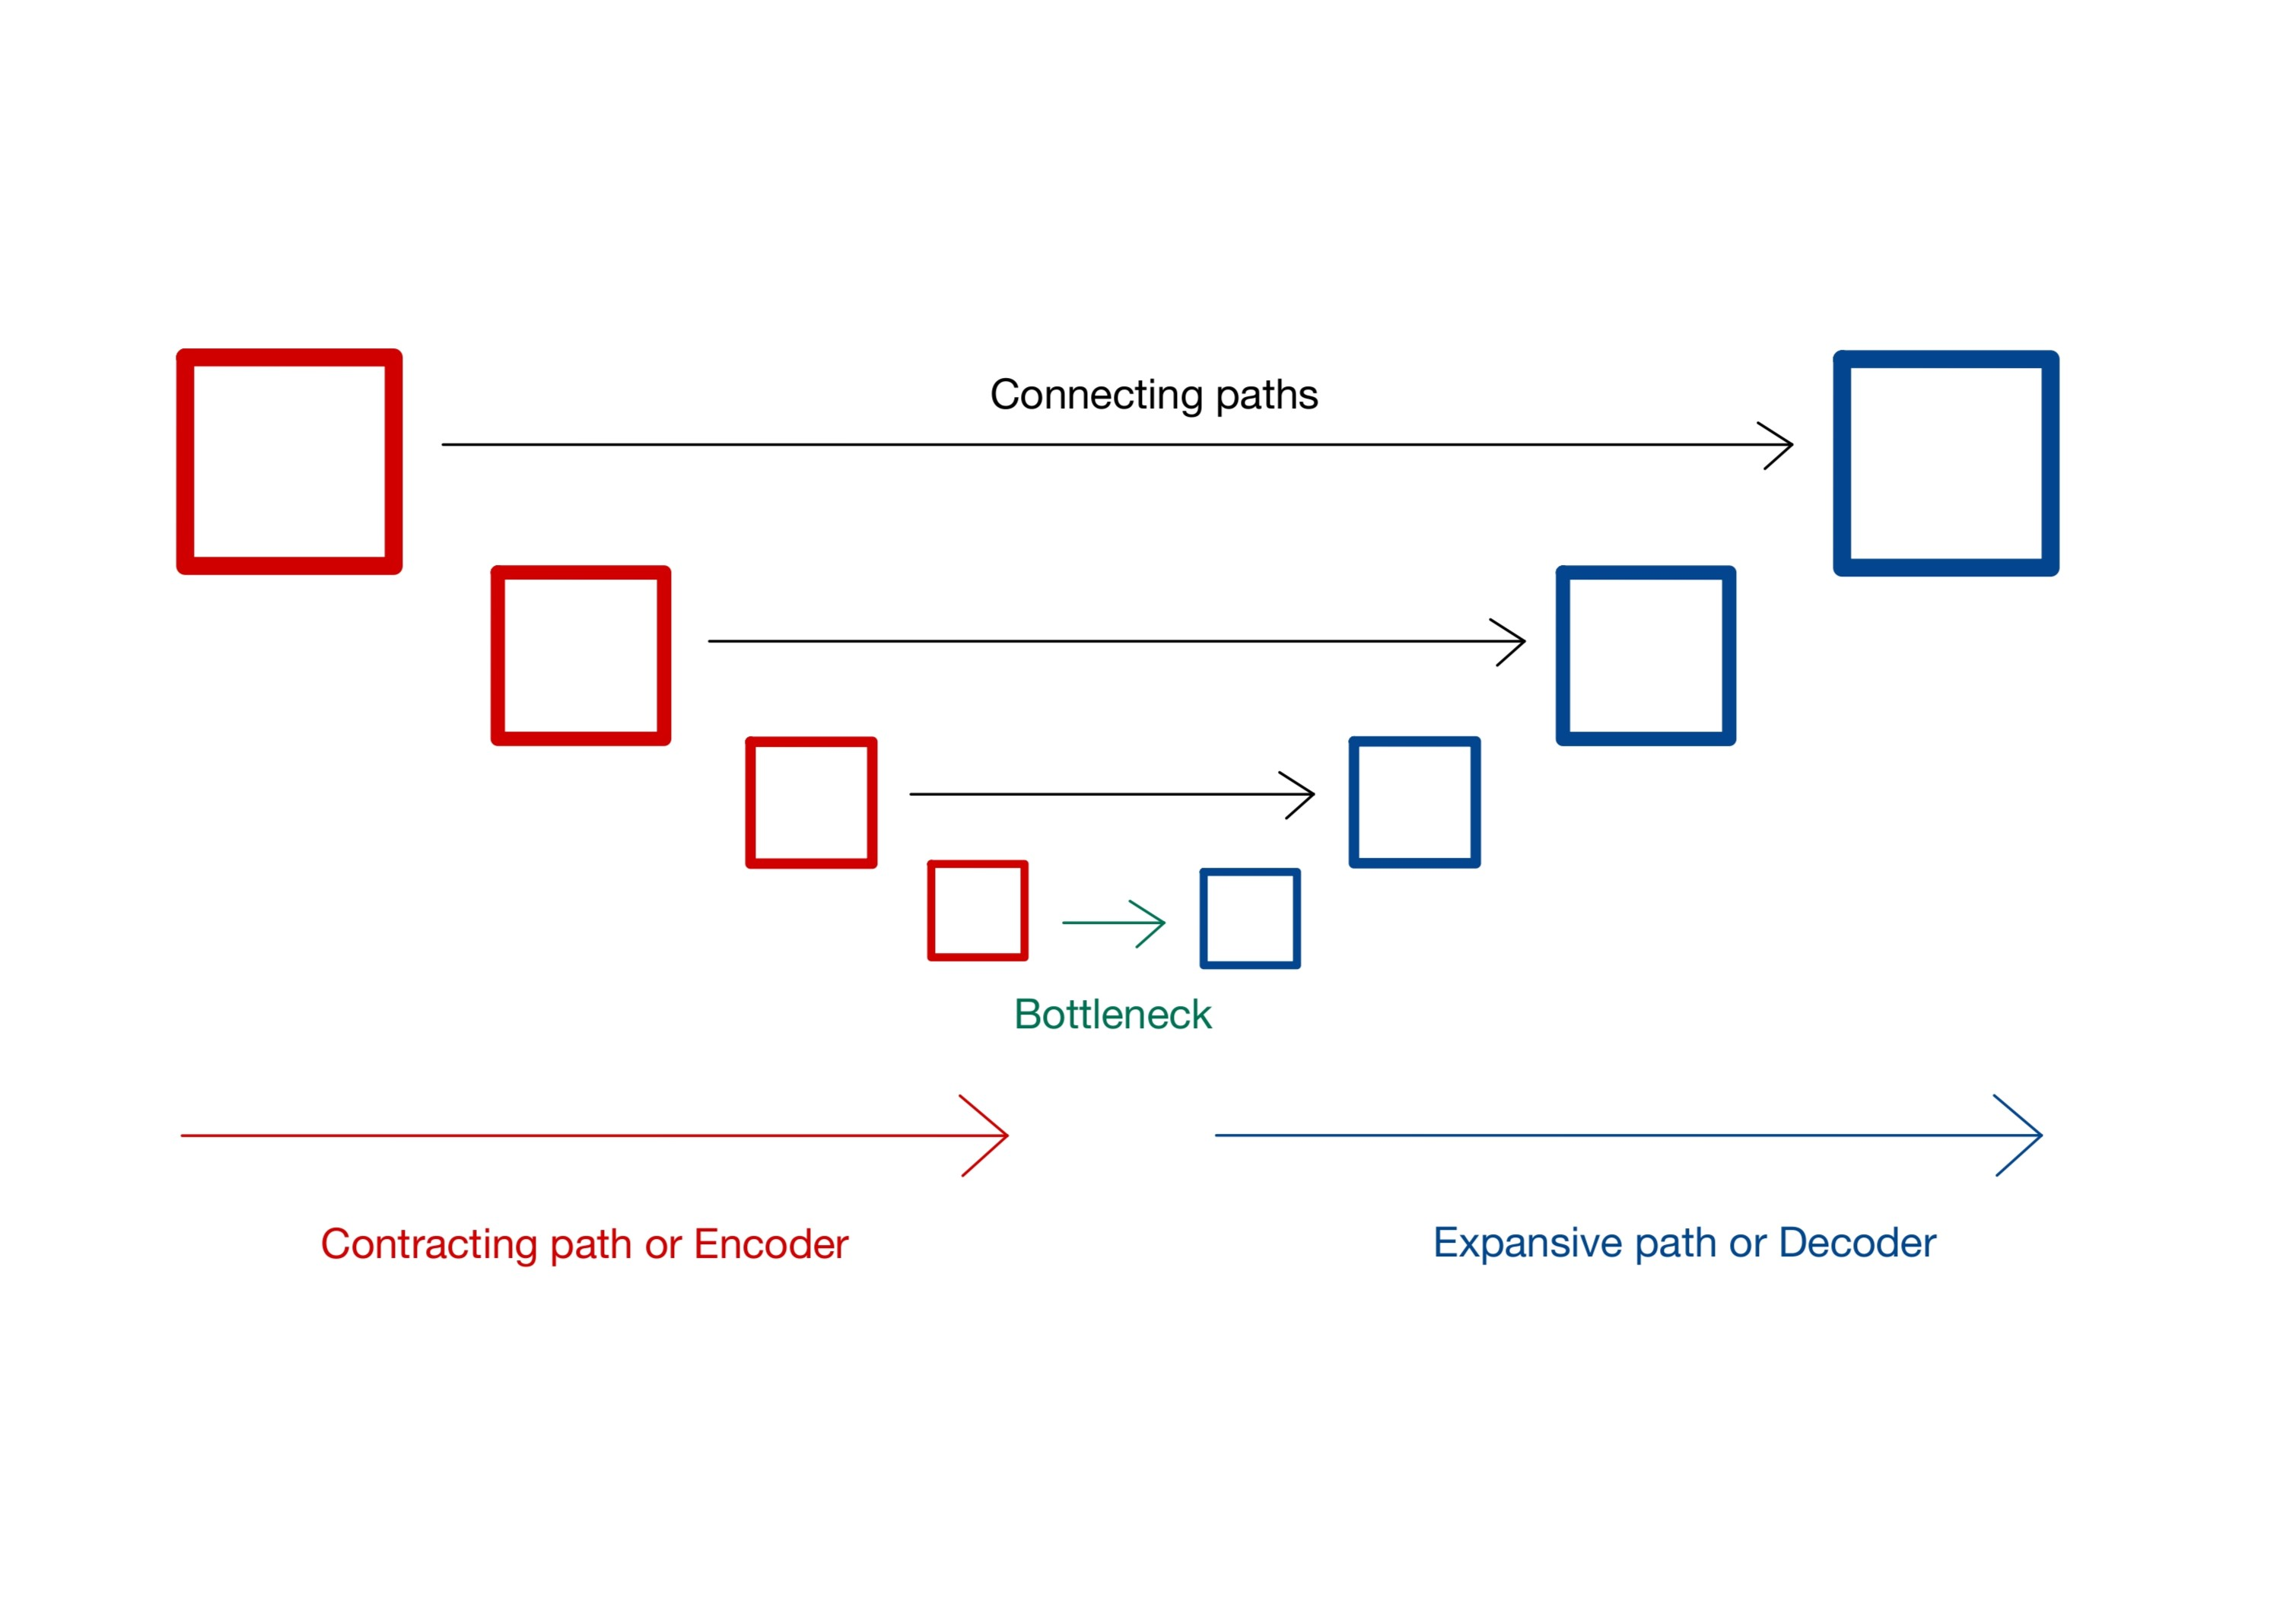
</div>

### Theory and Mechanics of Diffusion Models


Diffusion models are generative models that generate new data based on the data they are trained on. There are different types of diffusion models such as Denoising Diffusion Probabilistic Models (DDPMs), Score Based Generative Models (SGMs), or Stochastic Differential Equations (Score SDEs).

The initial paper on Diffusion Models is “Deep Unsupervised Learning using Nonequilibrium Thermodynamics” written by Sohl-Dickstein et al. in 2015. As described by Ho et al. (2020), a diffusion model is a parametrized Markov chain trained using variational inference to produce samples matching the data after finite time. The main idea of diffusion models is to add noise little by little to the data until it reaches a well-behaved distribution such as a Gaussian distribution for example, and then to use a neural network to learn the reverse process. The first part of adding noise is called forward diffusion process (q), the second phase is the backward diffusion process (p).

First, let us dive into the forward diffusion process. I will used the same notations as in the initial by paper by Sohl-Dickstein et al. (2015). The objective is to transform the data distribution $ q(x^{(0)}) $ into a well-behaved distribution $ \pi(y)$ by repeatedly applying a Markov diffusion kernel $T_\pi (y|y'; \beta)$ for $\pi(y)$ where $\beta $ is the diffusion rate. So, because we are in a Markov process, $x^{(t)}$ depends only on the previous time-step $x^{(t-1)}$. 

The forward trajectory, corresponding to starting at the data distribution and performing T steps of diffusion, is thus:

$$ q(x^{(0...T)}) = q(x^{(0)}) 	\prod\limits_{t=1}^T q(x^{(t)} | x^{(t-1)}) $$  

We need to be careful when choosing the value of the diffusion rate $\beta $, we can predefine it by giving it some value, or we can learn it with gradient descent. It is important to choose an adequate $\beta $ because it will influence the distribution we find at the end, and we want this distribution to be well-behaved. Let us remark that in general, all papers on diffusion models use the Gaussian distribution as the well-behaved distribution $\pi(y)$.

Now, let us have a look at the backward diffusion process. Here, we start from the well-behaved distribution $p(x^{(T)}) (= \pi(x^{(T)}))$ and we try to reach the original data. Thus, the equation of the backward diffusion process of the previous forward trajectory is:

$$ p(x^{(0...T)}) = p(x^{(T)}) 	\prod\limits_{t=1}^T p(x^{(t-1)} | x^{(t)}) $$

This is also a Markov process and, because we are doing the reverse trajectory, $x^{(t-1)}$ depends only on the previous time-step $x^{(t)}$.

However, the distribution p is unknown. We can assume that it is a Gaussian distribution, but we do not know its mean and covariance. Thus, we will need to estimate them during the training process using gradient descent.

Here is an illustration that I adapted of how diffusion models work from the paper by Ho et al. (2020):

<div>
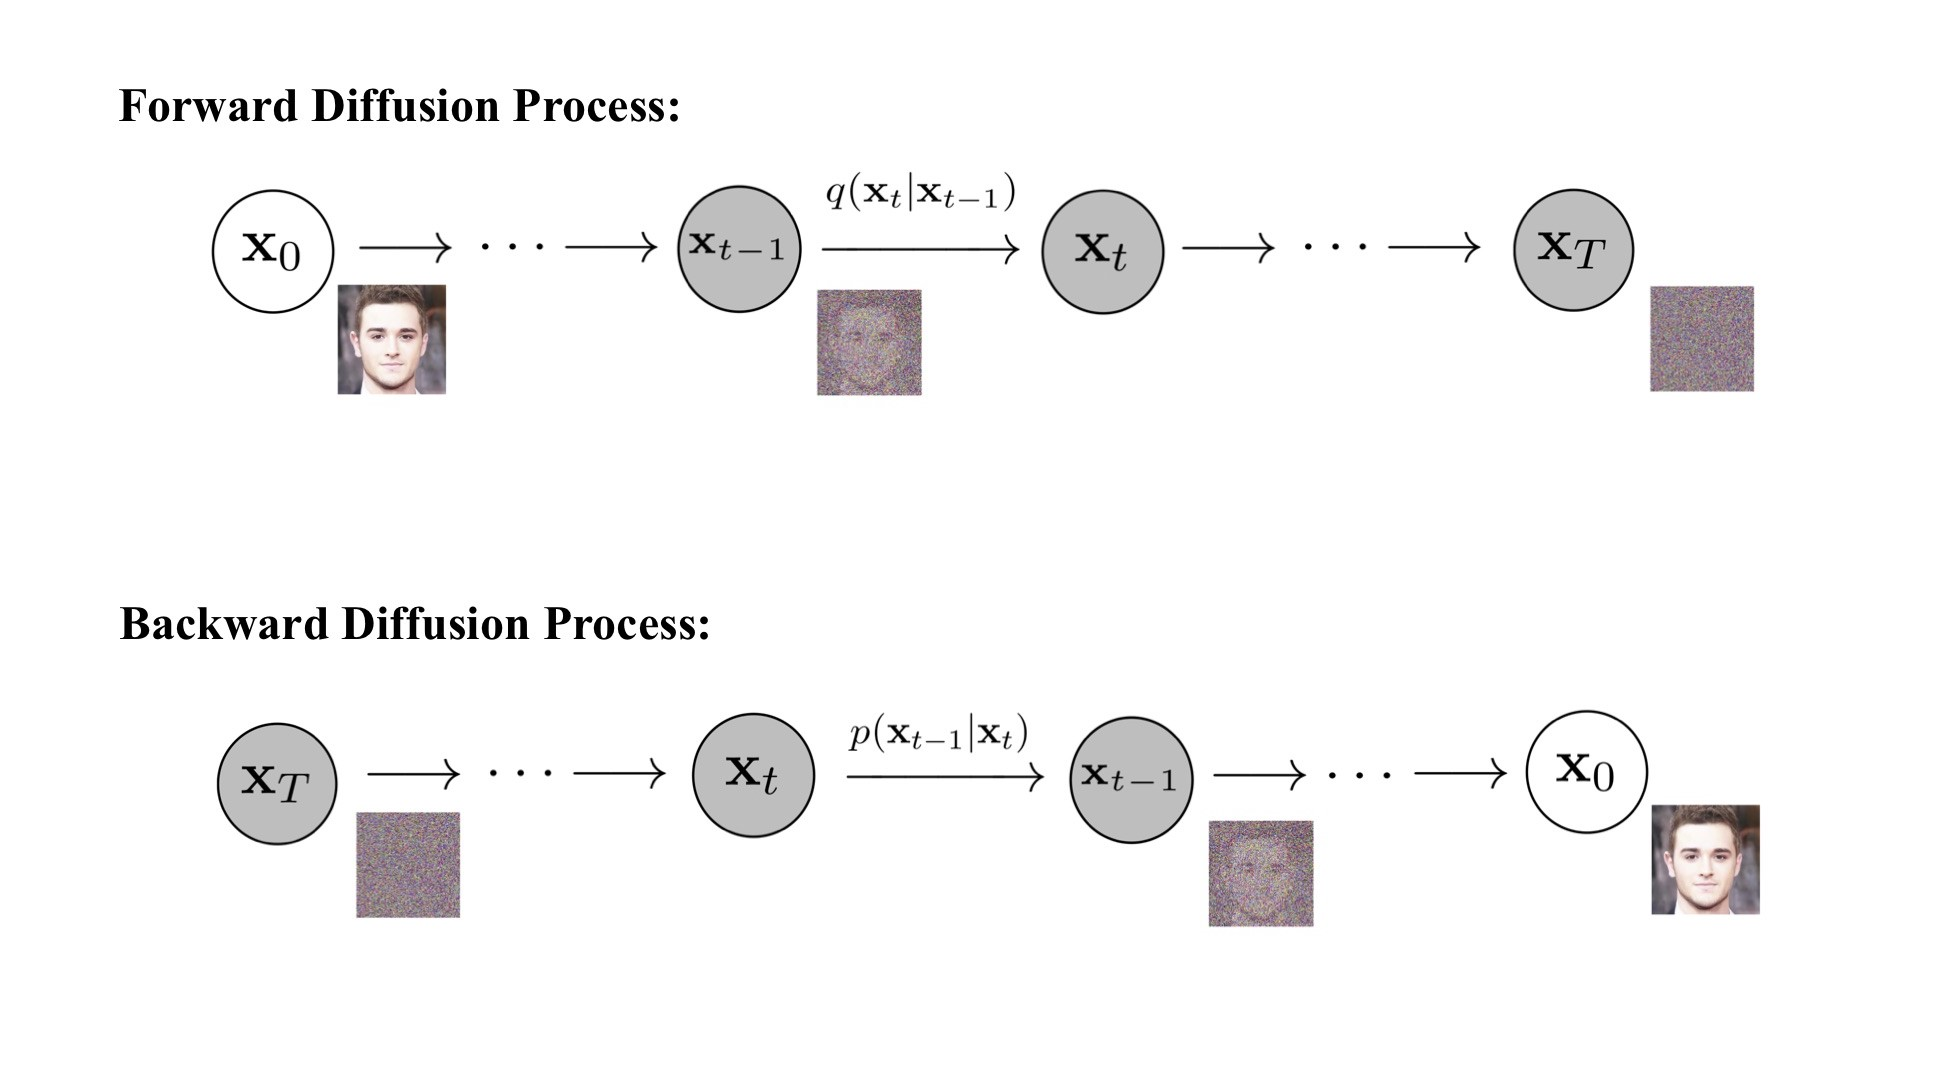
</div>

## 2. Dataset Preparation

*Utilize the CelebA dataset, ensuring appropriate preprocessing for diffusion models.*

**What is CelebA?**

The CelebFaces Attributes Dataset, or CelebA, is a large-scale face attributes dataset with  202,599 face images relating to over 10,000 celebrities. 

CelebA has large diversities, large quantities, and rich annotations, including:
- 10,177 number of identities,
- 202,599 number of face images, and
- 5 landmark locations, 40 binary attributes annotations per image.

First, let's import some packages used for loading  and preprocessiong the data set.

In [1]:
import os
import torch
from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torch.utils.data import Subset

In [2]:
current_path = os.getcwd()
IMAGE_PATH = current_path + '\\CelebA\\'
SAMPLE_PATH = current_path

if not os.path.exists(SAMPLE_PATH):
    os.makedirs(SAMPLE_PATH)

I am also going to transform the images by normalizing the pixel values.

First, I create a series of transformation functions to apply to the images in the dataset. So, the *transforms.Resize(64)* resizes each image to 64x64 pixels. The *transforms.ToTensor()* converts the image from a PIL Image format to a PyTorch tensor.
And the *transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))* normalizes the image tensor by setting its mean and standard deviation to 0.5 for all three color channels (RGB).

I then apply this transformation to all images in the dataset.

Finally, *DataLoader()* creates a data loader, which allows the model to load data in batches during training. This particular data loader loads data in batches of 16, shuffles the data at every epoch, and drops the last incomplete batch if the dataset size is not divisible by the batch size.

In [3]:
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset = ImageFolder(IMAGE_PATH, transform)

train_subset = Subset(dataset, range(1000))
data_loader = DataLoader(dataset=train_subset, batch_size=16, shuffle=True, drop_last=True)

In [4]:
len(data_loader)

62

Let's have a look at one image.

In [5]:
import PIL

In [6]:
images, _ = next(iter(data_loader))
images = images[:1]
images = (images + 1)*127.5 #denormalization

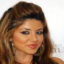

In [7]:
PIL.Image.fromarray((images.permute(0, 2, 3, 1)).type(torch.uint8).numpy()[0])

## 3. Implementing Diffusion Models

*Implement a diffusion model suitable for generating images from the CelebA dataset. Focus on integrating U-Net as a component of the diffusion model.*

*Utilize tutorials and resources such as Denoising Diffusion Probabilistic Models: https://arxiv.org/abs/2006.11239 and the Tutorial on Diffusion Model: https://github.com/d9w/gen_models/blob/main/Score_Based_Generative_Modelin*

First, let us define the U-Net architecture.

I am going to define a U-Net architecture with the following structure:

In [8]:
import tensorflow as tf

In [9]:
img_width = 64
img_height = 64
img_channels = 3

In [10]:
input_layer = tf.keras.layers.Input((img_width, img_height, img_channels))
conv_layer_1 = tf.keras.layers.Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(input_layer)



In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm

First, let's define the U-Net architecture

In [9]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()

        # Define your U-Net architecture here
        # Example architecture:
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 3, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        # Forward pass through U-Net
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [10]:
 from dataclasses import dataclass
    
@dataclass
class TrainingConfig:
     image_size = 128 # the generated image resolution
     train_batch_size = 16
     eval_batch_size = 16 # how many images to sample during evaluation
     num_epochs = 50
     gradient_accumulation_steps = 1
     learning_rate = 1e-4
     lr_warmup_steps = 500
     save_image_epochs = 10
     save_model_epochs = 30
     mixed_precision = 'fp16' # `no` for float32, `fp16` for automatic mixed precision
     output_dir = 'CelebA-ddpm' # the model namy locally and on the HF Hub
     push_to_hub = True # whether to upload the saved model to the HF Hub
     hub_private_repo = False
     overwrite_output_dir = True # overwrite the old model when re-running the notebook
     seed = 0
        
config = TrainingConfig()

In [11]:
from diffusers import UNet2DModel
    
model = UNet2DModel(
     sample_size=config.image_size, # the target image resolution
     in_channels=3, # the number of input channels, 3 for RGB images
     out_channels=3, # the number of output channels
     layers_per_block=2, # how many ResNet layers to use per UNet block
     block_out_channels=(128, 128, 256, 256, 512, 512), # the number of output channels for each UNet block
     down_block_types=(
         "DownBlock2D", # a regular ResNet downsampling block
         "DownBlock2D",
         "DownBlock2D",
         "DownBlock2D",
         "AttnDownBlock2D", # a ResNet downsampling block with spatial self-attention
         "DownBlock2D",
     ),
     up_block_types=(
         "UpBlock2D", # a regular ResNet upsampling block
         "AttnUpBlock2D", # a ResNet upsampling block with spatial self-attention
         "UpBlock2D",
         "UpBlock2D",
         "UpBlock2D",
         "UpBlock2D"
     ),
)


Now, let's define the diffusion model

In [12]:
class DiffusionModel(nn.Module):
    def __init__(self, unet):
        super(DiffusionModel, self).__init__()
        self.unet = unet

    def forward(self, x, t):
        # Perform diffusion steps using U-Net
        for _ in range(t):
            x = x + torch.randn_like(x)  # Add noise
            x = self.unet(x)  # U-Net transformation

        return x

Initialize U-Net and diffusion model

In [13]:
unet = UNet()
diffusion_model = DiffusionModel(unet)

Let's train the model

In [14]:
# Hyperparameters
batch_size = 32
learning_rate = 0.001
num_epochs = 10

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(diffusion_model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for images, _ in tqdm(data_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        images = images  # Assuming you have a GPU available
        optimizer.zero_grad()
        
        # Perform forward pass through the diffusion model
        outputs = diffusion_model(images, t=10)  # You can adjust 't' based on your requirements

        # Compute the loss
        loss = criterion(outputs, images)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

    # Print the loss after each epoch
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

# Save the trained model if needed
torch.save(diffusion_model.state_dict(), 'diffusion_model.pth')

Epoch 2/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 1/10, Loss: 0.3421572148799896


Epoch 3/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 2/10, Loss: 0.32168224453926086


Epoch 4/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 3/10, Loss: 0.38411930203437805


Epoch 5/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 4/10, Loss: 0.39590999484062195


Epoch 6/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 5/10, Loss: 0.37767016887664795


Epoch 7/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 6/10, Loss: 0.3870847225189209


Epoch 8/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 7/10, Loss: 0.3475557863712311


Epoch 9/10:   0%|                                                                               | 0/62 [00:00<?, ?it/s]

Epoch 8/10, Loss: 0.36205044388771057


Epoch 10/10:   0%|                                                                              | 0/62 [00:00<?, ?it/s]

Epoch 9/10, Loss: 0.35881927609443665


Epoch 10/10: 100%|█████████████████████████████████████████████████████████████████████| 62/62 [05:45<00:00,  5.57s/it]

Epoch 10/10, Loss: 0.31304946541786194


## 4. Generating Images with Diffusion Models

*Apply the implemented diffusion model to generate images from the CelebA dataset. Evaluate the quality and fidelity of the generated images.*

In [15]:
import torch
from torchvision.utils import save_image
from tqdm import tqdm

# Assuming you have the trained diffusion model saved as 'diffusion_model.pth'
# and the U-Net architecture is defined in the previous code.

# Load the pre-trained U-Net and diffusion model
unet = UNet()
diffusion_model = DiffusionModel(unet)
diffusion_model.load_state_dict(torch.load('diffusion_model.pth'))
diffusion_model.eval()

# Set the device (CPU or GPU) based on availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
diffusion_model.to(device)

# Generate and save images using the trained model
num_samples = 10  # Number of images to generate

with torch.no_grad():
    for i in tqdm(range(num_samples), desc='Generating Images'):
        # Initialize a random tensor as a starting point for the diffusion process
        generated_image = torch.randn(1, 3, 128, 128).to(device)

        # Apply the diffusion process using the trained model
        generated_image = diffusion_model(generated_image, t=10)  # You can adjust 't' based on your training configuration

        # Save the generated image
        save_image(generated_image.squeeze(), f'generated_image_{i + 1}.png', normalize=True)


Generating Images: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 11.40it/s]
